In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TFM/tennis_players_rivalries_stats_top100.csv')

In [ ]:
dataset

,Player ID,Opponent ID,Ace,Double Fault,1st Serve,1st Serve Won,2nd Serve Won,Break Points Saved,Service Points Won,Service Games Won,...,Double Fault Against,1st Serve Return Won,2nd Serve Return Won,Break Points Won,Return Points Won,Return Games Won,Total Points Won,Games Won,Sets Won,Matches Won
0,4920,4742,6.1,2.1,65.8,67.5,51.90,56.9,62.2,75.9,...,2.1,34.9,48.5,40.6,39.2,25.9,50.7,50.8,51.6,50.8
1,4920,3819,5.6,3.2,64.4,68.8,54.60,63.7,63.7,81.0,...,2.3,26.9,49.1,39.0,35.4,18.9,49.8,49.6,50.0,54.0
2,4920,4913,4.8,2.5,63.4,67.8,54.30,61.5,62.8,79.1,...,3.4,32.4,55.3,43.0,42.0,31.3,52.3,55.3,61.6,69.4
3,4920,4606,7.4,2.9,65.3,74.6,54.50,63.6,67.6,88.1,...,3.7,28.4,57.6,49.5,41.6,30.4,54.4,59.6,80.9,89.3
4,4920,4526,4.4,2.1,65.1,72.3,55.50,61.4,66.5,82.0,...,2.5,32.6,51.9,37.7,40.6,27.3,52.8,54.7,67.1,77.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6824,11433,52294,15.5,11.9,46.4,79.5,46.70,66.7,61.9,78.6,...,4.7,23.7,50.0,20.0,31.8,7.1,46.7,42.9,33.3,0.0
6825,11433,11550,9.8,6.5,59.8,70.9,59.50,87.5,66.3,91.7,...,9.9,25.0,61.9,28.6,34.6,16.7,51.4,54.2,100.0,100.0
6826,11433,5466,8.7,9.3,50.3,79.3,40.70,53.3,60.1,73.1,...,5.7,32.4,43.8,60.0,37.1,22.2,48.9,49.1,40.0,0.0
6827,11433,4095,16.3,6.7,55.8,75.9,43.50,75.0,61.5,86.7,...,4.3,41.5,48.7,50.0,44.6,35.7,53.6,62.1,66.7,100.0


## Preprocesado de datos


Vamos a limpiar los registros de stats que no estén completos

In [ ]:
# Columnas de estadísticas que deben estar completas
columns_to_check = [
    "Ace", "Double Fault", "1st Serve", "1st Serve Won", "2nd Serve Won",
    "Break Points Saved", "Service Points Won", "Service Games Won",
    "Ace Against", "Double Fault Against", "1st Serve Return Won", "2nd Serve Return Won",
    "Break Points Won", "Return Points Won", "Return Games Won", "Total Points Won",
    "Games Won", "Sets Won", "Matches Won"
]

# Eliminamos filas con valores vacíos en las columnas de estadísticas
cleaned_dataset_1 = dataset.dropna(subset=columns_to_check)

# Mostramos DataFrame limpiado
cleaned_dataset_1

,Player ID,Opponent ID,Ace,Double Fault,1st Serve,1st Serve Won,2nd Serve Won,Break Points Saved,Service Points Won,Service Games Won,...,Double Fault Against,1st Serve Return Won,2nd Serve Return Won,Break Points Won,Return Points Won,Return Games Won,Total Points Won,Games Won,Sets Won,Matches Won
0,4920,4742,6.1,2.1,65.8,67.5,51.9,56.9,62.2,75.9,...,2.1,34.9,48.5,40.6,39.2,25.9,50.7,50.8,51.6,50.8
1,4920,3819,5.6,3.2,64.4,68.8,54.6,63.7,63.7,81.0,...,2.3,26.9,49.1,39.0,35.4,18.9,49.8,49.6,50.0,54.0
2,4920,4913,4.8,2.5,63.4,67.8,54.3,61.5,62.8,79.1,...,3.4,32.4,55.3,43.0,42.0,31.3,52.3,55.3,61.6,69.4
3,4920,4606,7.4,2.9,65.3,74.6,54.5,63.6,67.6,88.1,...,3.7,28.4,57.6,49.5,41.6,30.4,54.4,59.6,80.9,89.3
4,4920,4526,4.4,2.1,65.1,72.3,55.5,61.4,66.5,82.0,...,2.5,32.6,51.9,37.7,40.6,27.3,52.8,54.7,67.1,77.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6823,11433,11766,22.0,3.4,76.3,80.0,42.9,33.3,71.2,80.0,...,2.2,27.5,40.0,11.1,33.0,9.1,48.0,42.9,0.0,0.0
6824,11433,52294,15.5,11.9,46.4,79.5,46.7,66.7,61.9,78.6,...,4.7,23.7,50.0,20.0,31.8,7.1,46.7,42.9,33.3,0.0
6825,11433,11550,9.8,6.5,59.8,70.9,59.5,87.5,66.3,91.7,...,9.9,25.0,61.9,28.6,34.6,16.7,51.4,54.2,100.0,100.0
6826,11433,5466,8.7,9.3,50.3,79.3,40.7,53.3,60.1,73.1,...,5.7,32.4,43.8,60.0,37.1,22.2,48.9,49.1,40.0,0.0


In [ ]:
# Eliminamos la característica 'porcentaje de sets ganados' y 'games won'
cleaned_dataset_2 = cleaned_dataset_1.drop(columns=['Sets Won', 'Games Won'])

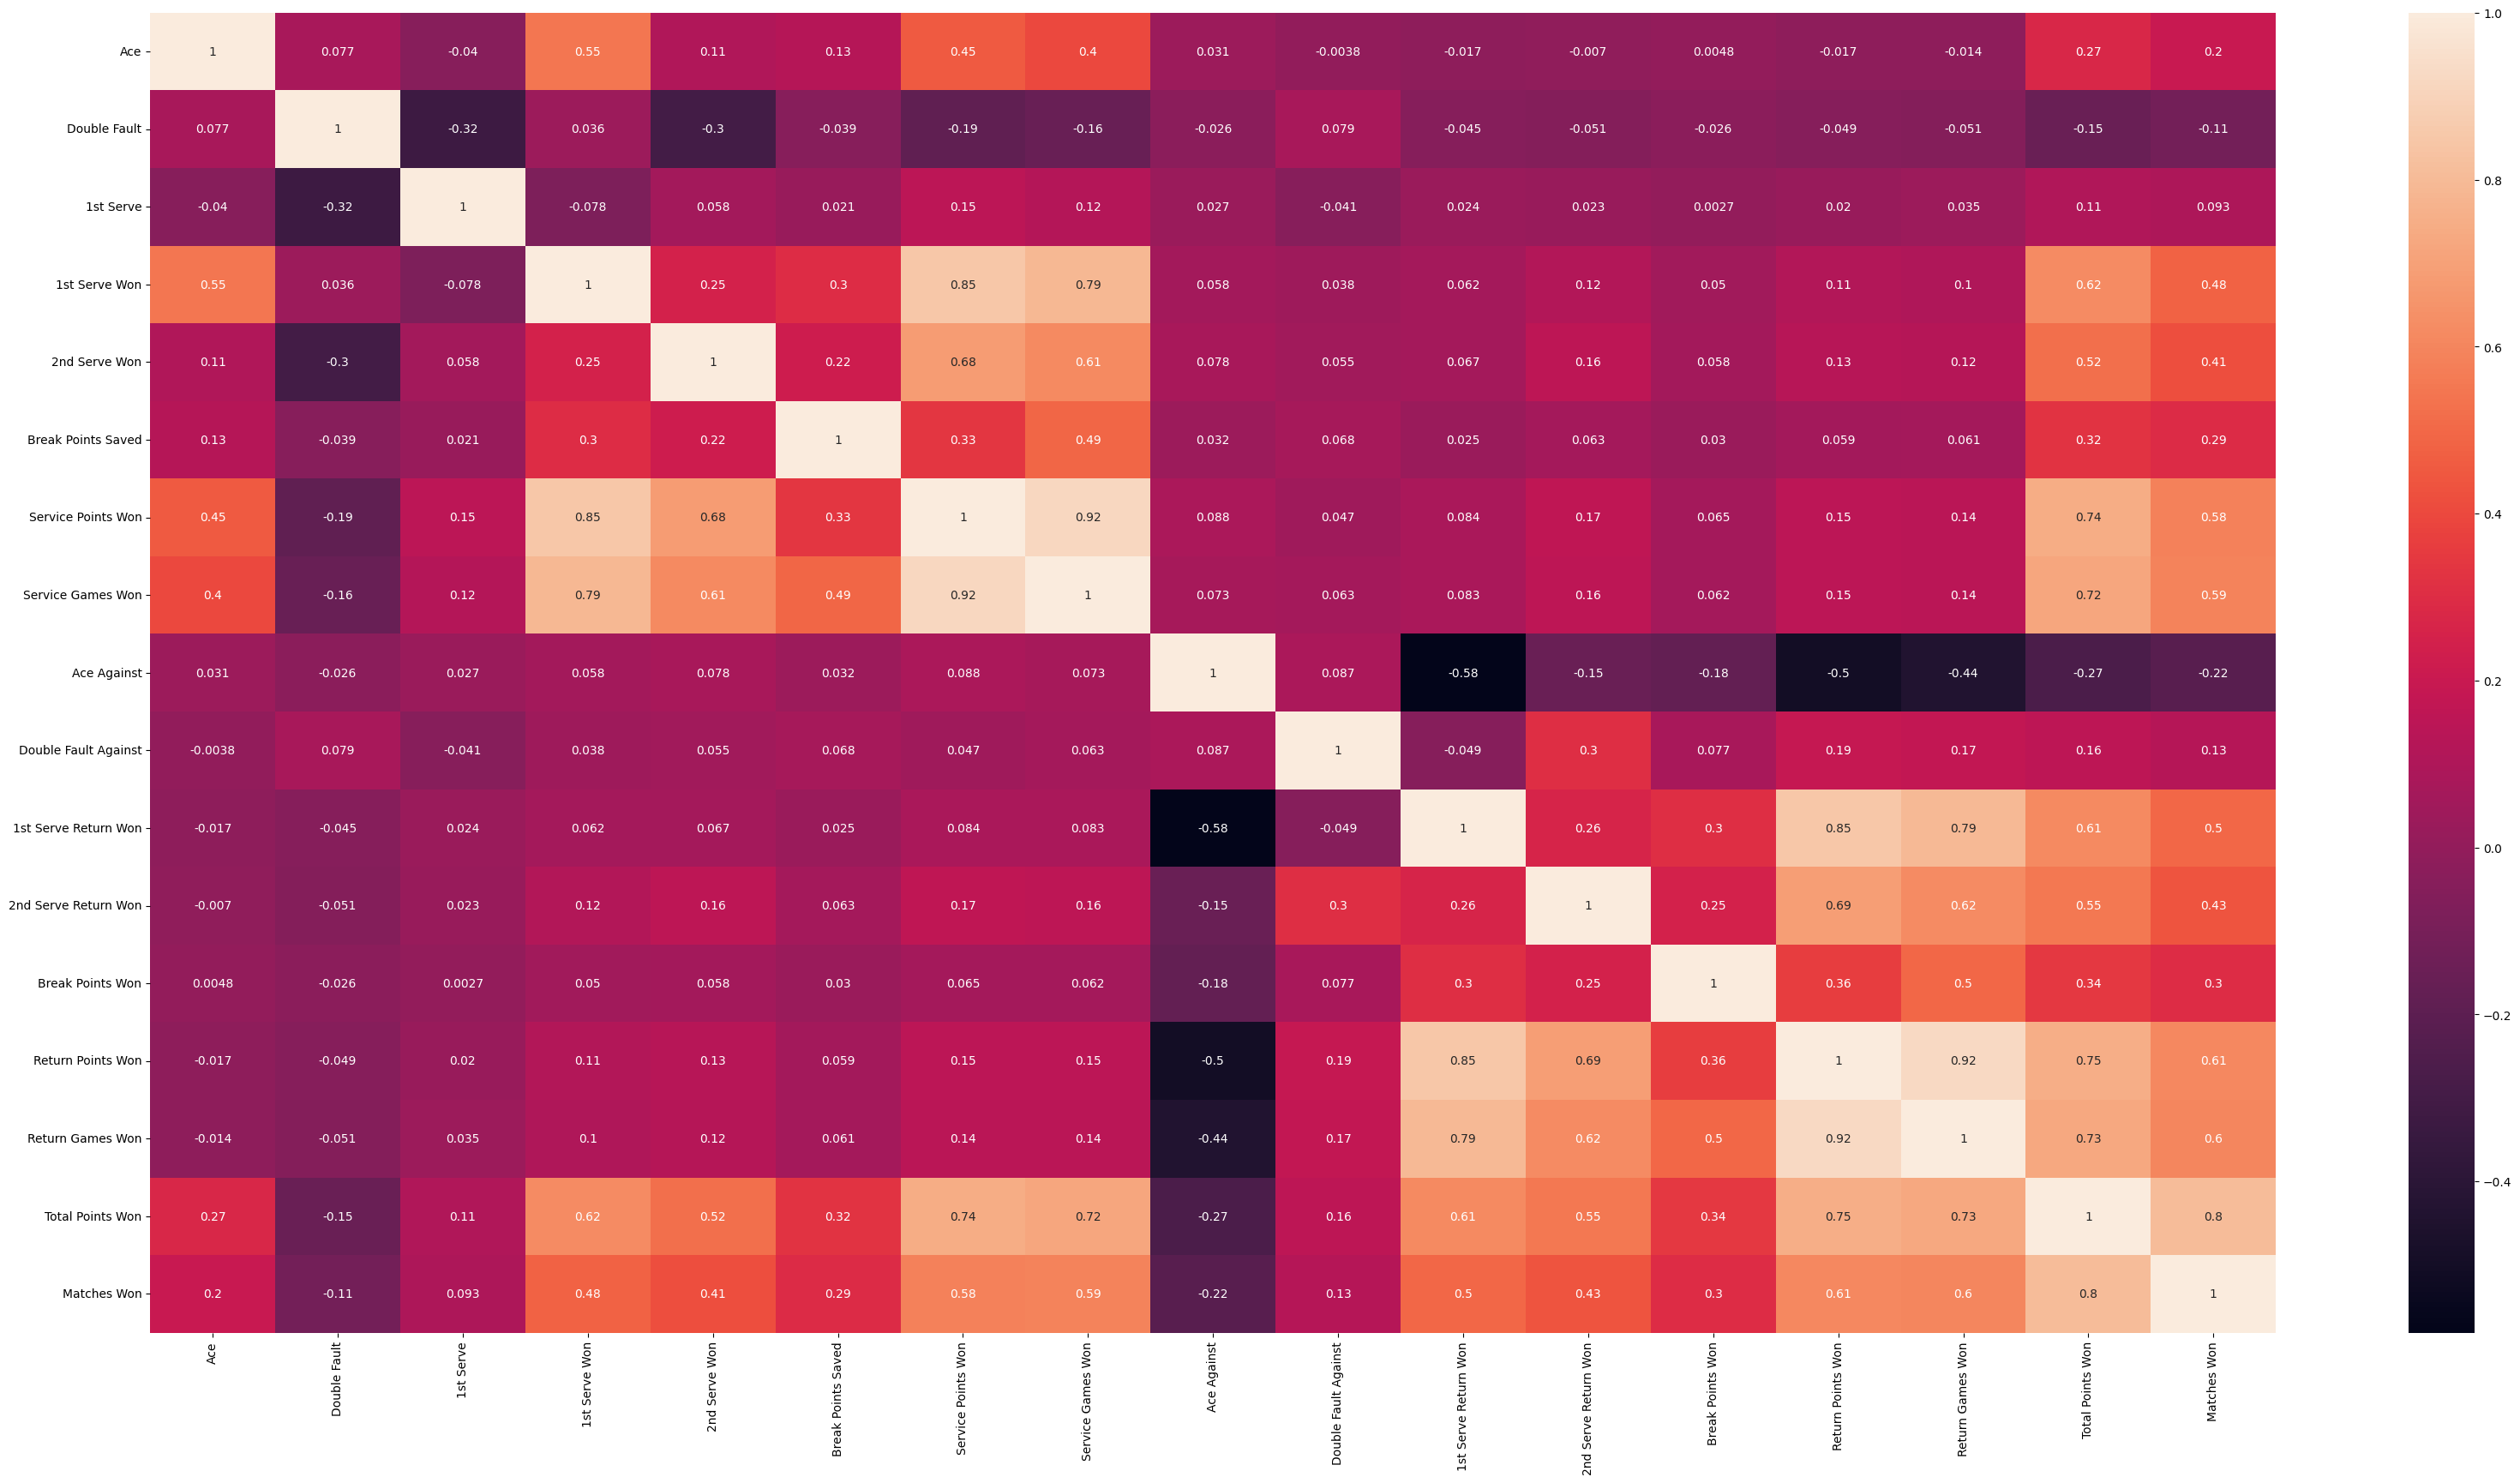

In [ ]:
import seaborn as sns
heatmap_dataset = cleaned_dataset_2.drop(columns=['Player ID', 'Opponent ID'])
plt.figure(figsize = (20,20))
sns.heatmap(heatmap_dataset.corr(), annot = True)
plt.gcf().set_size_inches(40,20)

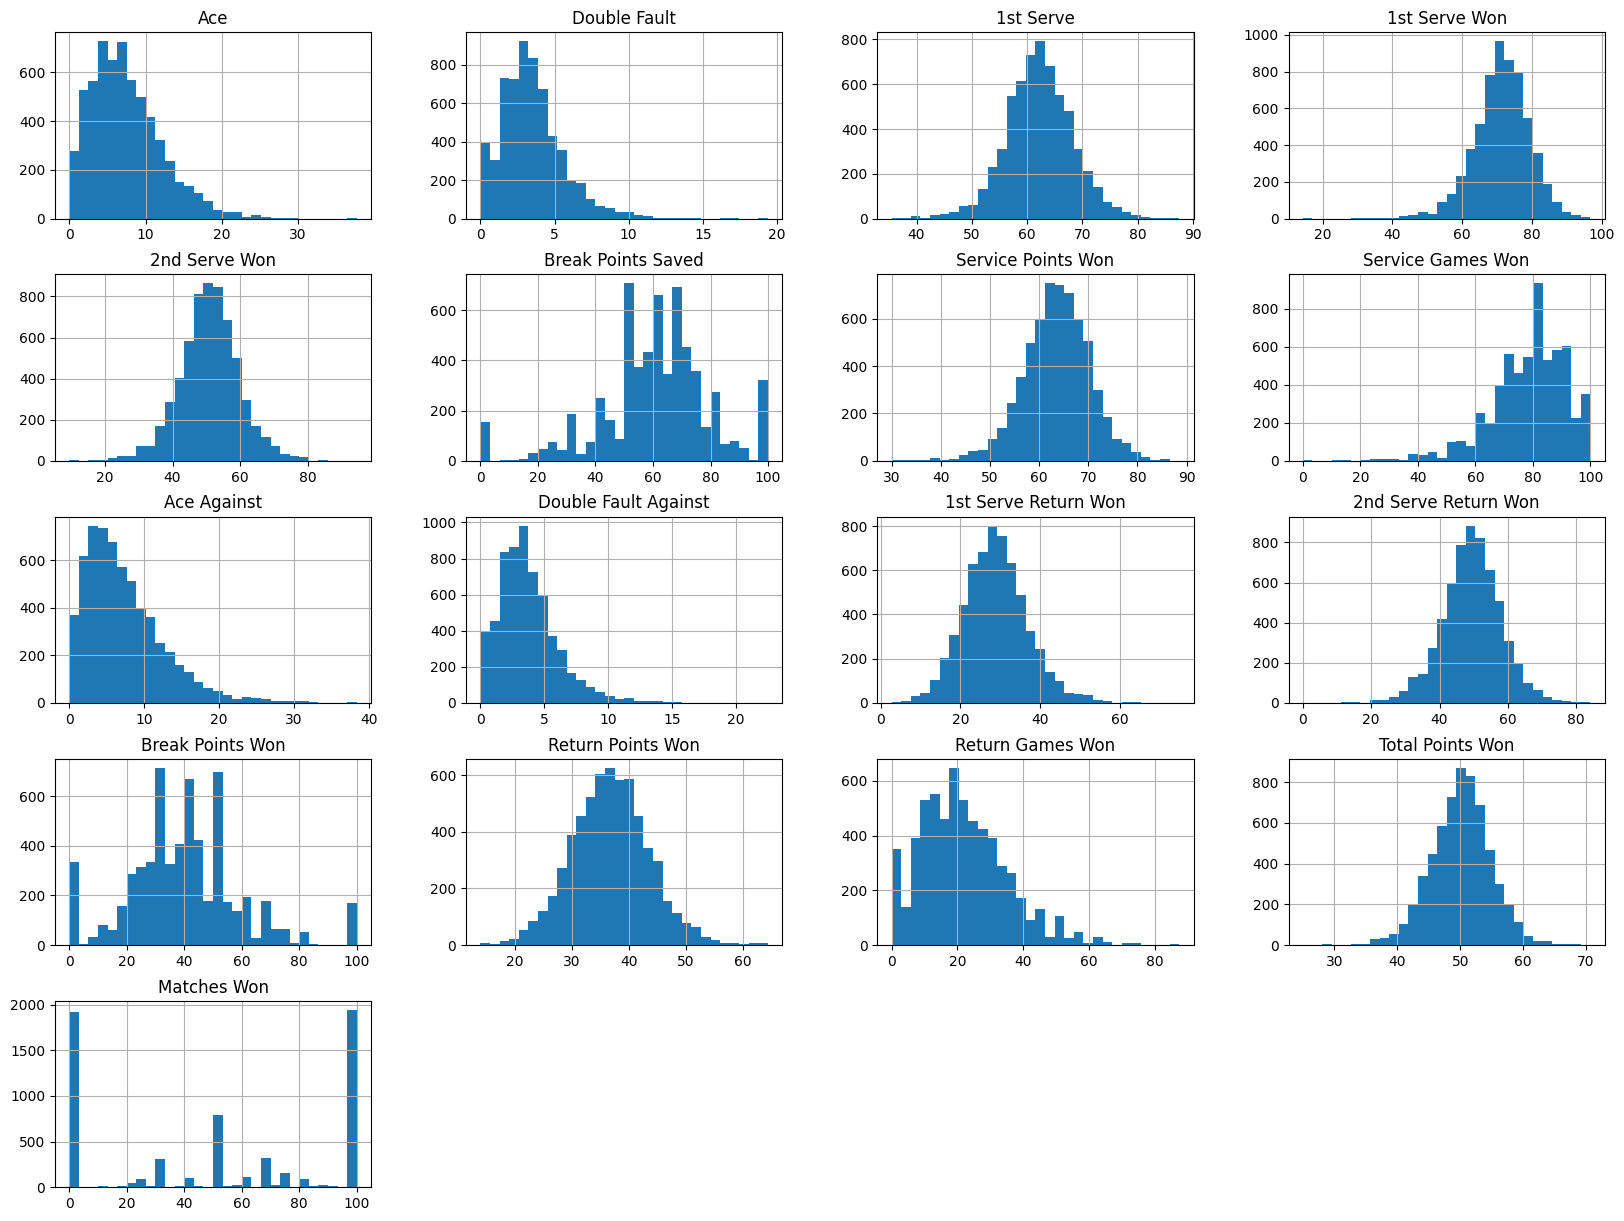

In [ ]:
# Análisis de distribución de variables
histogram = cleaned_dataset_2.drop(columns=['Player ID', 'Opponent ID'])
histogram.hist(bins=30, figsize=(20,15))
plt.show()

Hay demasiados registros con 0% de victoria y 100%. Dos enfoques: Eliminarlos directamente o se prueba a penalizar en el entreno las predicciones por encima de 100 con una funcion de perdida personalizada para las redes neuronales

## Regresores eliminando esos registros de 0 y 100

In [ ]:
# Filtramos los registros con 0% y 100% de victorias
filtered_dataset = cleaned_dataset_1[(cleaned_dataset_1['Matches Won'] > 0) & (cleaned_dataset_1['Matches Won'] < 100)]

In [ ]:
filtered_dataset

,Player ID,Opponent ID,Ace,Double Fault,1st Serve,1st Serve Won,2nd Serve Won,Break Points Saved,Service Points Won,Service Games Won,...,Double Fault Against,1st Serve Return Won,2nd Serve Return Won,Break Points Won,Return Points Won,Return Games Won,Total Points Won,Games Won,Sets Won,Matches Won
0,4920,4742,6.1,2.1,65.8,67.5,51.9,56.9,62.2,75.9,...,2.1,34.9,48.5,40.6,39.2,25.9,50.7,50.8,51.6,50.8
1,4920,3819,5.6,3.2,64.4,68.8,54.6,63.7,63.7,81.0,...,2.3,26.9,49.1,39.0,35.4,18.9,49.8,49.6,50.0,54.0
2,4920,4913,4.8,2.5,63.4,67.8,54.3,61.5,62.8,79.1,...,3.4,32.4,55.3,43.0,42.0,31.3,52.3,55.3,61.6,69.4
3,4920,4606,7.4,2.9,65.3,74.6,54.5,63.6,67.6,88.1,...,3.7,28.4,57.6,49.5,41.6,30.4,54.4,59.6,80.9,89.3
4,4920,4526,4.4,2.1,65.1,72.3,55.5,61.4,66.5,82.0,...,2.5,32.6,51.9,37.7,40.6,27.3,52.8,54.7,67.1,77.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6686,33081,44493,7.6,8.7,53.3,79.6,48.8,88.9,65.2,92.3,...,4.9,28.8,61.4,57.1,42.7,28.6,53.3,59.3,66.7,50.0
6763,11433,5131,16.0,3.3,55.2,82.0,51.9,62.5,68.5,89.3,...,0.6,25.7,31.7,42.9,28.0,11.1,49.4,50.9,60.0,50.0
6765,11433,5324,11.6,5.8,63.6,74.5,47.6,50.0,64.7,82.1,...,8.2,19.0,66.2,41.2,39.0,25.9,51.5,54.5,50.0,50.0
6766,11433,4180,12.3,5.5,58.2,84.7,52.5,66.7,71.2,92.0,...,7.7,22.1,41.7,22.2,29.7,7.7,49.8,49.0,60.0,50.0


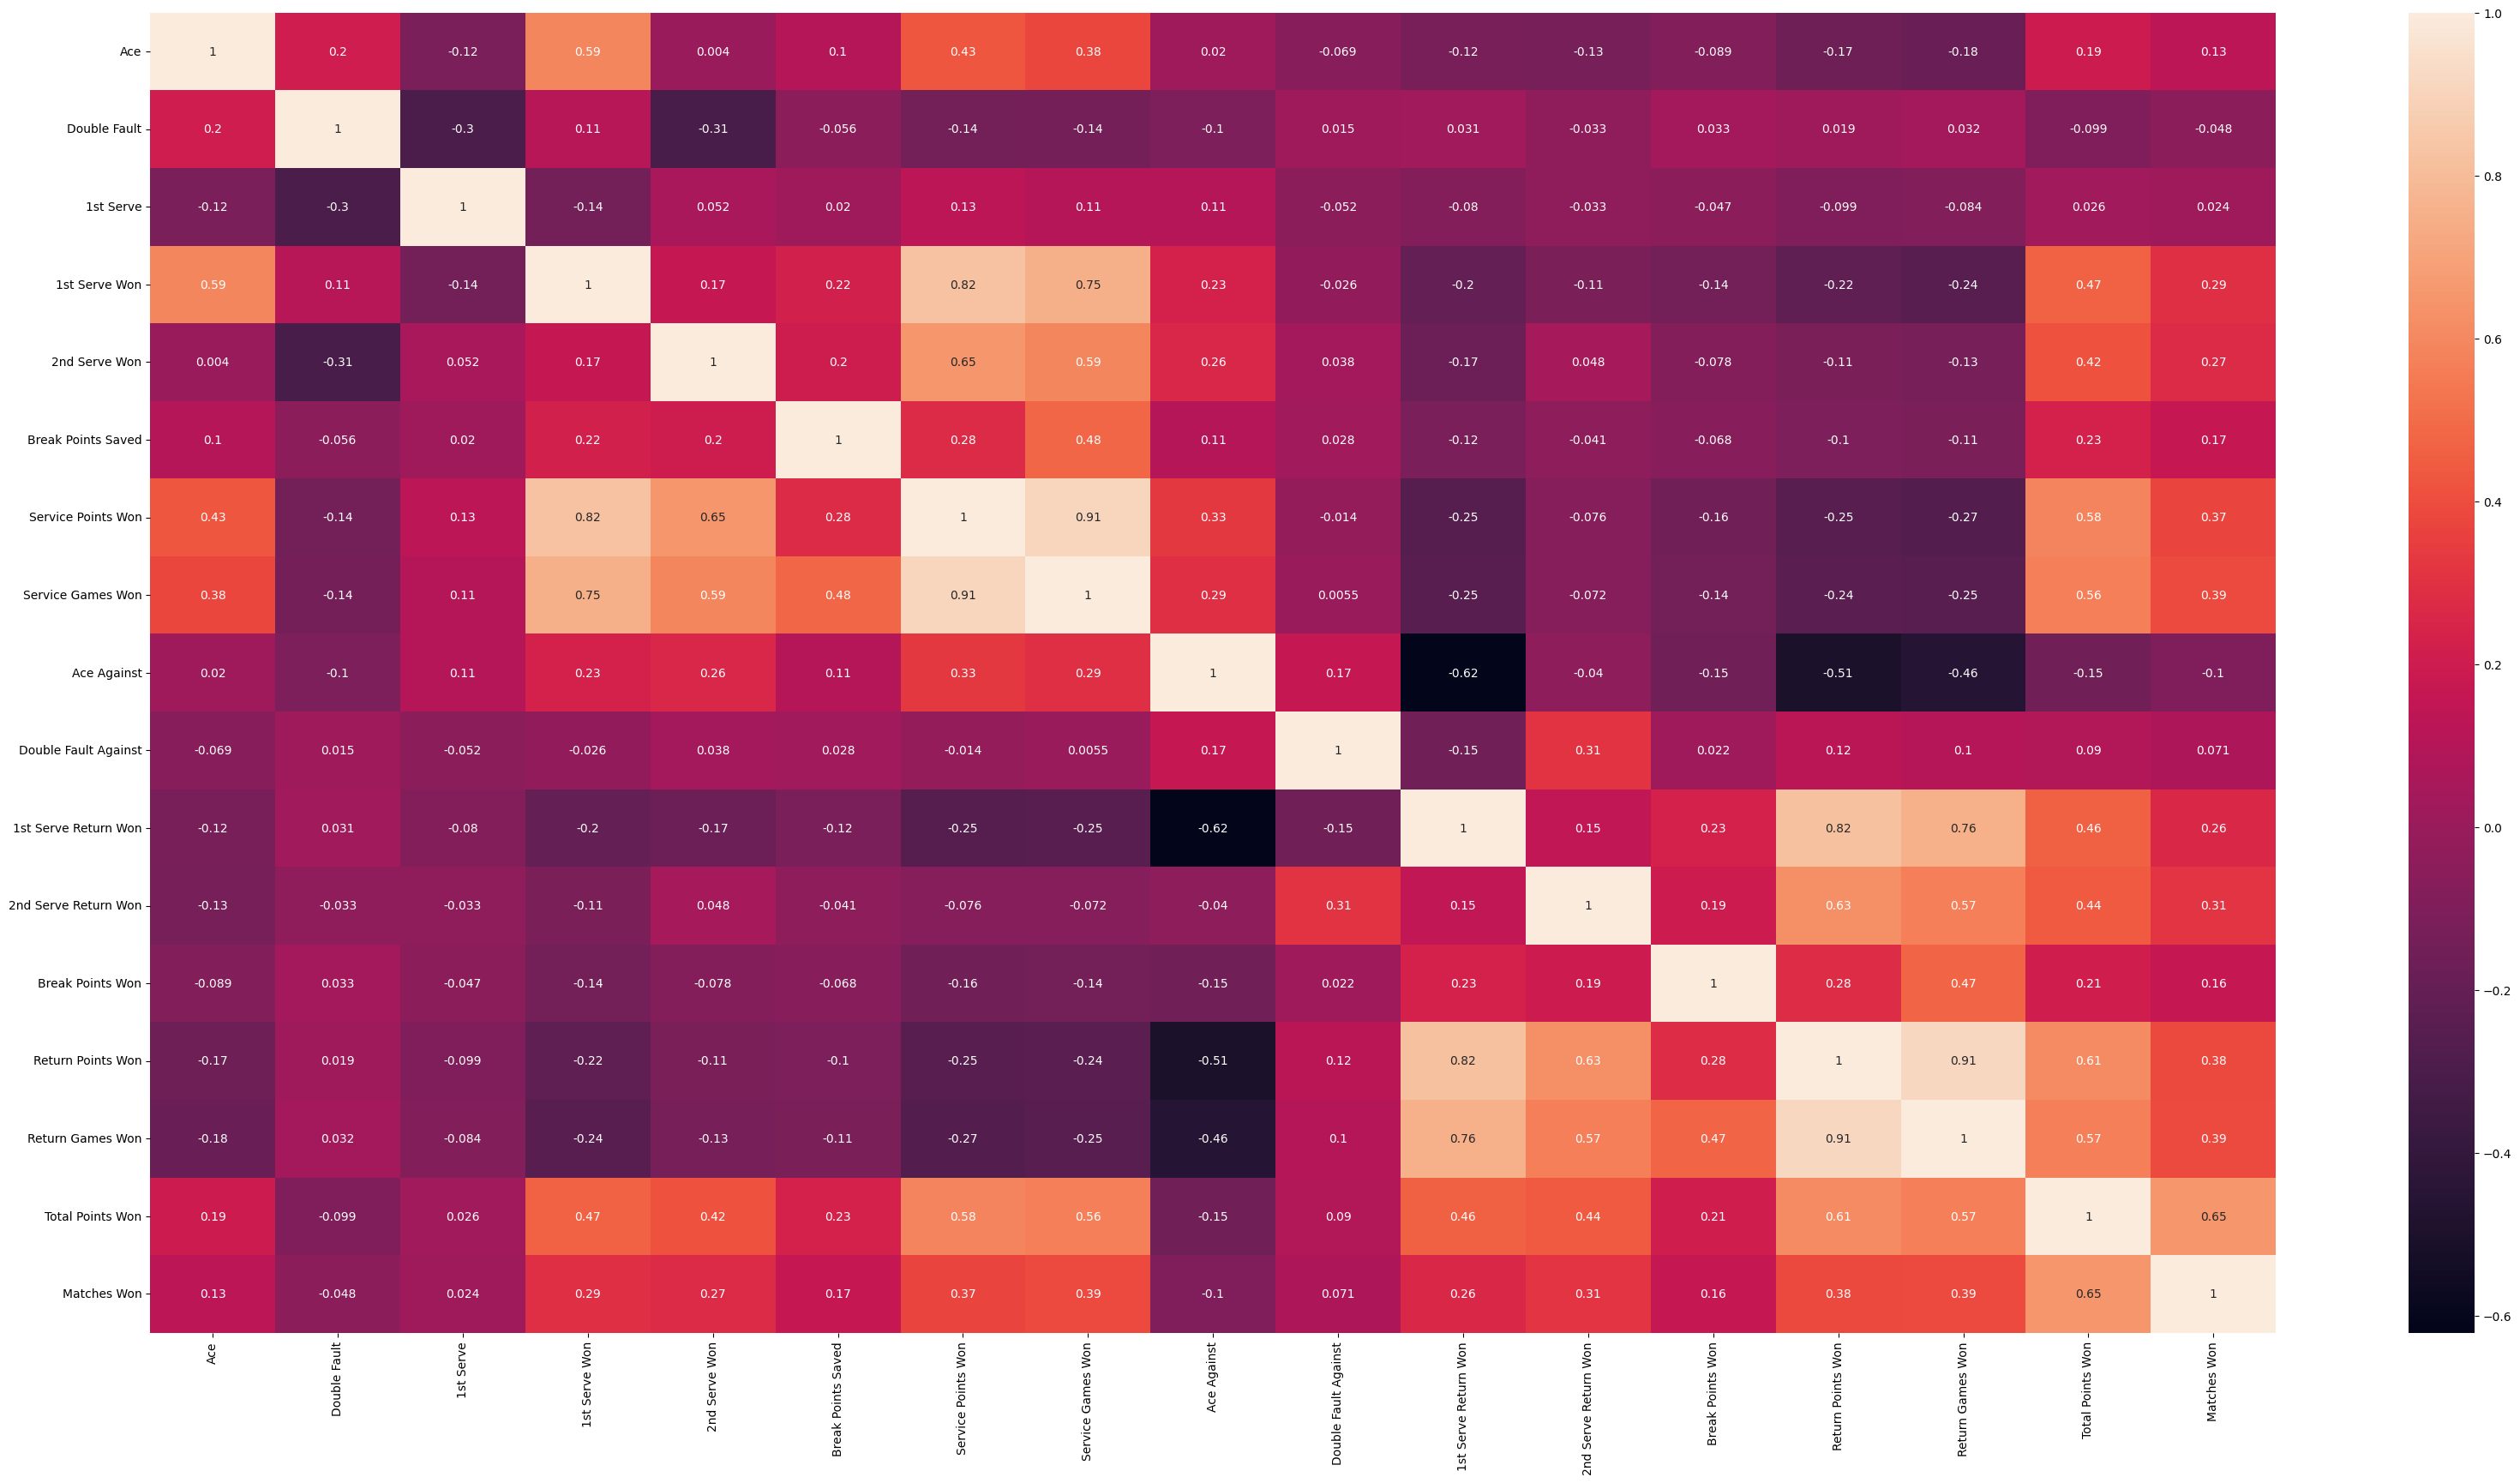

In [ ]:
heatmap_dataset = filtered_dataset.drop(columns=['Player ID', 'Opponent ID','Sets Won', 'Games Won'])
plt.figure(figsize = (20,20))
sns.heatmap(heatmap_dataset.corr(), annot = True)
plt.gcf().set_size_inches(40,20)

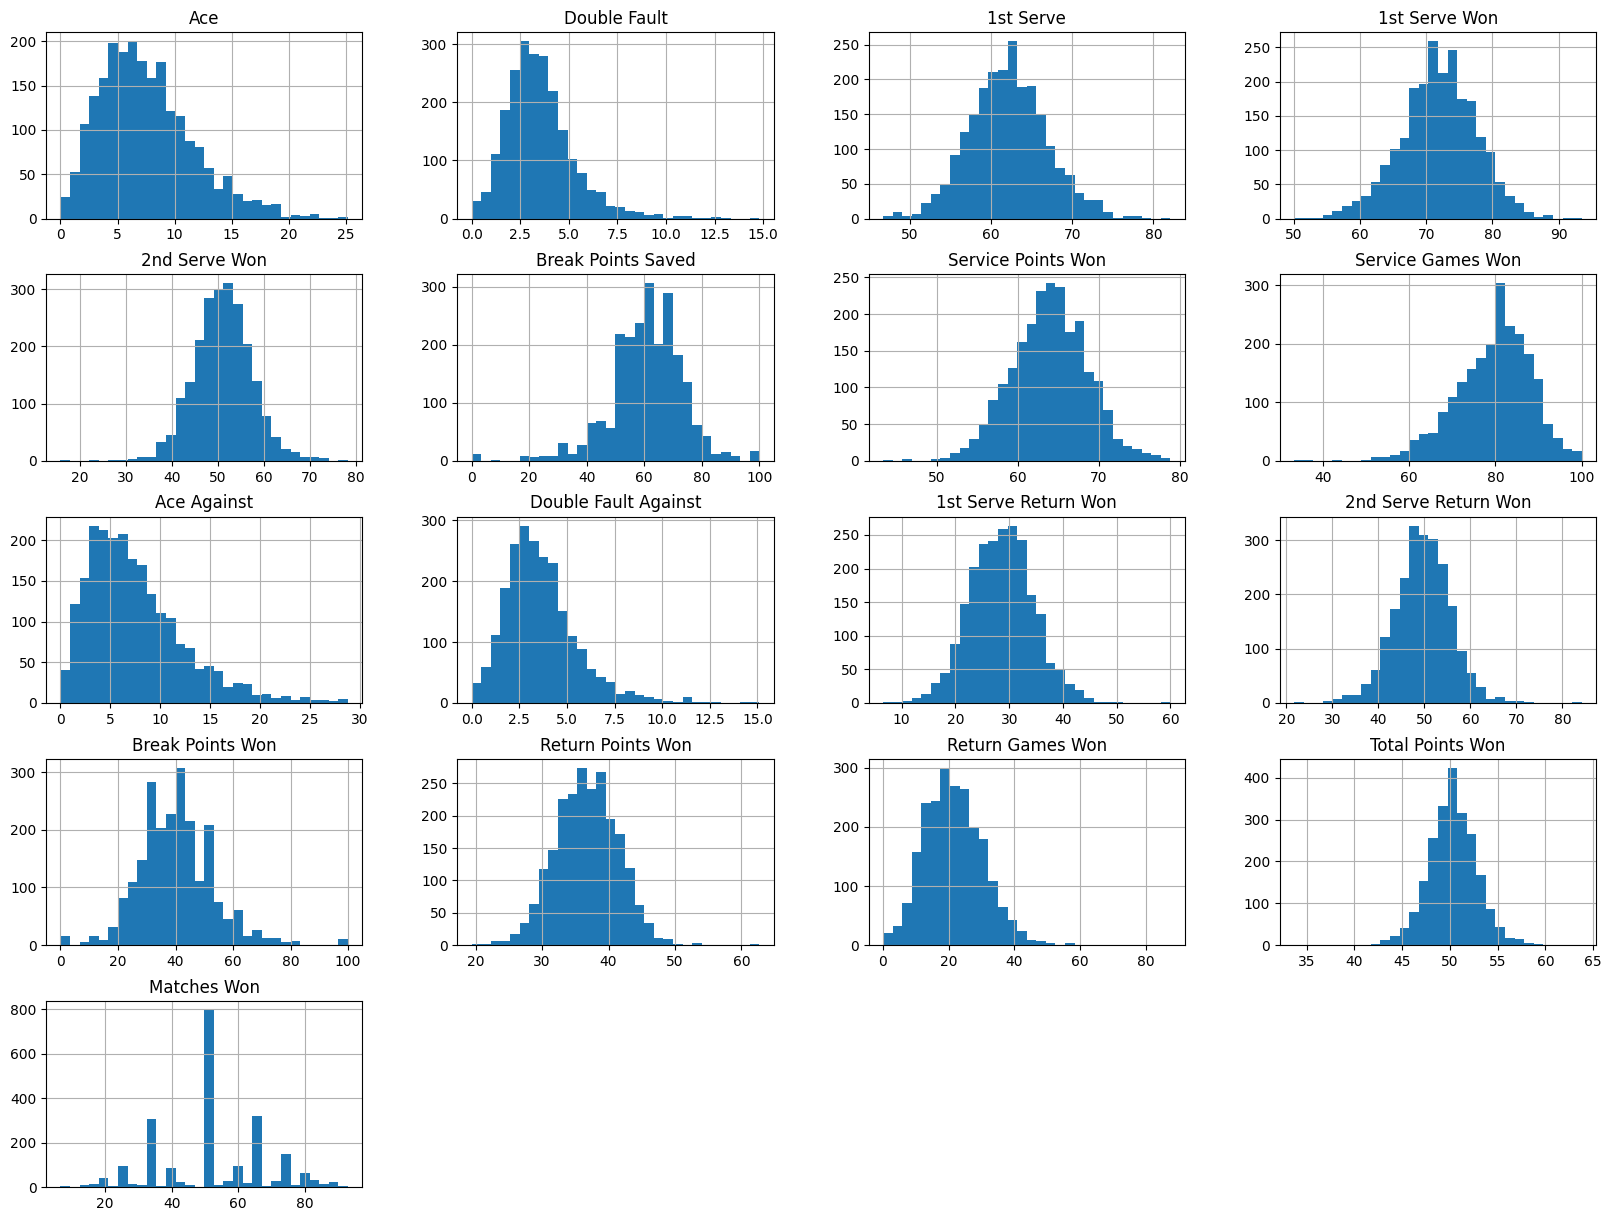

In [ ]:
# Análisis de distribución de variables
heatmap_dataset.hist(bins=30, figsize=(20,15))
plt.show()

## Entrenar un modelo

Este modelo va a coger las estadisticas de un jugador 1 contra un jugador 2, las del jugador 2 contra el jugador 1 y las va a poner unas detras de la otra. La variable objetivo es el porcentaje de victoria del 1.

También va a ordenarlo de forma inversa: las del jugador 2 contra el 1 y detrás las del jugador 1 contra el 2 y en este caso la variable objetivo es el porcentaje de victoria del jugador 2.

In [ ]:
# Creamos nuevas características que incluyan tanto al jugador como al oponente en ambos órdenes
features = []
target = []

for index, row in filtered_dataset.iterrows():
    player_id = row["Player ID"]
    opponent_id = row["Opponent ID"]

    player_stats = row[[
        "Ace", "Double Fault", "1st Serve", "1st Serve Won", "2nd Serve Won",
        "Break Points Saved", "Service Points Won", "Service Games Won",
        "Ace Against", "Double Fault Against", "1st Serve Return Won", "2nd Serve Return Won",
        "Break Points Won", "Return Points Won", "Return Games Won", "Total Points Won"
    ]]

    opponent_stats = filtered_dataset[(filtered_dataset["Player ID"] == opponent_id) & (filtered_dataset["Opponent ID"] == player_id)]
    if not opponent_stats.empty:
        opponent_stats = opponent_stats.iloc[0][[
            "Ace", "Double Fault", "1st Serve", "1st Serve Won", "2nd Serve Won",
            "Break Points Saved", "Service Points Won", "Service Games Won",
            "Ace Against", "Double Fault Against", "1st Serve Return Won", "2nd Serve Return Won",
            "Break Points Won", "Return Points Won", "Return Games Won", "Total Points Won"
        ]]

        # Orden jugador 1 contra jugador 2
        feature_1 = list(player_stats.values) + list(opponent_stats.values)
        features.append(feature_1)
        target.append(row["Matches Won"])

        # Orden jugador 2 contra jugador 1
        feature_2 = list(opponent_stats.values) + list(player_stats.values)
        opponent_matches_won = 100 - row["Matches Won"]
        features.append(feature_2)
        target.append(opponent_matches_won)

# Convertimos las listas a DataFrames
X = pd.DataFrame(features)
y = pd.Series(target)

# Transformación logarítmica de la variable objetivo
y = np.log1p(y)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
len(features)

2160

In [ ]:
# Definimos los modelos a evaluar
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Evaluamos cada modelo utilizando validación cruzada
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    results[name] = (-cv_scores.mean(), cv_scores.std())

# Mostramos resultados de validación cruzada
for name, (mean_score, std_dev) in results.items():
    print(f"{name}: Mean MSE = {mean_score:.2f}, Std Dev = {std_dev:.2f}")

Linear Regression: Mean MSE = 0.08, Std Dev = 0.00
Ridge Regression: Mean MSE = 0.08, Std Dev = 0.00
Lasso Regression: Mean MSE = 0.13, Std Dev = 0.01
Random Forest: Mean MSE = 0.03, Std Dev = 0.01
Gradient Boosting: Mean MSE = 0.06, Std Dev = 0.01
XGBoost: Mean MSE = 0.03, Std Dev = 0.01


In [ ]:
# Seleccionamos el mejor modelo basado en el menor MSE
best_model_name = min(results, key=lambda x: results[x][0])
best_model = models[best_model_name]
print(f"Best model: {best_model_name}")

Best model: XGBoost


In [ ]:
# Definimos la cuadrícula de hiperparámetros para GridSearchCV
param_grid = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}

# Realizamos GridSearchCV solo si el mejor modelo es Random Forest, Gradient Boosting o XGBoost
if best_model_name in param_grid:
    grid_search = GridSearchCV(best_model, param_grid[best_model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")

# Evaluamos el mejor modelo en el conjunto de prueba
y_test_pred = best_model.predict(X_test_scaled)

# Invertimos la transformación logarítmica
y_test_pred = np.expm1(y_test_pred)
y_test = np.expm1(y_test)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print(f"Best Model Test MSE: {test_mse:.2f}")
print(f"Best Model Test R²: {test_r2:.2f}")
print(f"Best Model Test MAE: {test_mae:.2f}")
print(f"Best Model Test RMSE: {test_rmse:.2f}")

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best Model Test MSE: 49.89
Best Model Test R²: 0.83
Best Model Test MAE: 4.30
Best Model Test RMSE: 7.06


In [ ]:
# Mostramos todos los valores reales y predichos
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

print(results_df)

      Actual  Predicted
2079    50.0  49.409714
668     14.3  19.466761
2073    33.3  37.711880
1113    66.7  66.495659
788     33.3  33.756241
...      ...        ...
438     25.0  27.112942
900     50.0  43.355270
1613    66.7  63.690281
20      83.3  74.248505
785     50.0  47.857697

[432 rows x 2 columns]


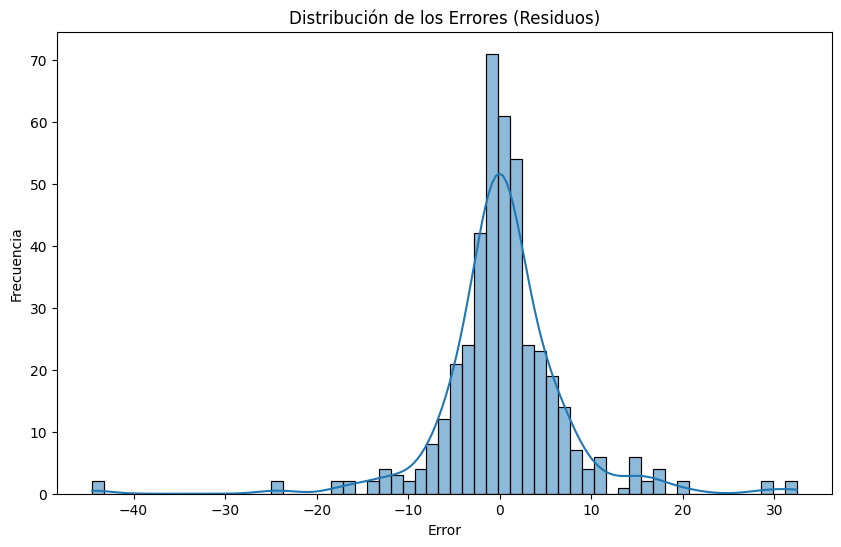

In [ ]:
# Visualización de la distribución de errores
residuals = y_test - y_test_pred

plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Distribución de los Errores (Residuos)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Función para predecir el resultado de un partido
def predict_match_outcome(player_id, opponent_id):
    # Buscamos las estadísticas del jugador
    player_stats = filtered_dataset[filtered_dataset["Player ID"] == player_id].iloc[0][[
        "Ace", "Double Fault", "1st Serve", "1st Serve Won", "2nd Serve Won",
        "Break Points Saved", "Service Points Won", "Service Games Won",
        "Ace Against", "Double Fault Against", "1st Serve Return Won", "2nd Serve Return Won",
        "Break Points Won", "Return Points Won", "Return Games Won", "Total Points Won"
    ]]

    # Buscamoslas estadísticas del oponente
    opponent_stats = filtered_dataset[filtered_dataset["Player ID"] == opponent_id].iloc[0][[
        "Ace", "Double Fault", "1st Serve", "1st Serve Won", "2nd Serve Won",
        "Break Points Saved", "Service Points Won", "Service Games Won",
        "Ace Against", "Double Fault Against", "1st Serve Return Won", "2nd Serve Return Won",
        "Break Points Won", "Return Points Won", "Return Games Won", "Total Points Won"
    ]]

    # Creamos características combinadas en ambos órdenes
    features_1 = list(player_stats.values) + list(opponent_stats.values)
    features_2 = list(opponent_stats.values) + list(player_stats.values)

    # Convertimos las características a DataFrame
    features_1_df = pd.DataFrame([features_1])
    features_2_df = pd.DataFrame([features_2])

    # Normalizamos las características
    features_1_scaled = scaler.transform(features_1_df)
    features_2_scaled = scaler.transform(features_2_df)

    # Predecimos el resultado en ambos órdenes con el mejor modelo
    prediction_1 = np.expm1(best_model.predict(features_1_scaled)[0])
    prediction_2 = np.expm1(best_model.predict(features_2_scaled)[0])

    # Calculamos los porcentajes de victoria
    player_win_percentage = (prediction_1 + (100 - prediction_2)) / 2
    opponent_win_percentage = 100 - player_win_percentage

    return player_win_percentage, opponent_win_percentage

# Ejemplo de uso
player_id = 4920
opponent_id = 52602
player_win_percentage, opponent_win_percentage = predict_match_outcome(player_id, opponent_id)
print(f"Player {player_id} win percentage: {player_win_percentage:.2f}%")
print(f"Opponent {opponent_id} win percentage: {opponent_win_percentage:.2f}%")

Player 4920 win percentage: 56.30%
Opponent 52602 win percentage: 43.70%


## Redes neuronales eliminando los registros de 0% y 100%

In [ ]:
! pip install tensorflow keras

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Cargamos dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TFM/tennis_players_rivalries_stats_top100.csv')

# Procesado de los datos

In [ ]:
# Limpiamos del dataset
columns_to_check = [
    "Ace", "Double Fault", "1st Serve", "1st Serve Won", "2nd Serve Won",
    "Break Points Saved", "Service Points Won", "Service Games Won",
    "Ace Against", "Double Fault Against", "1st Serve Return Won", "2nd Serve Return Won",
    "Break Points Won", "Return Points Won", "Return Games Won", "Total Points Won",
    "Games Won", "Sets Won", "Matches Won"
]
cleaned_dataset = dataset.dropna(subset=columns_to_check)

In [ ]:
# Filtramos los registros con 0% y 100% de victorias
filtered_dataset = cleaned_dataset[(cleaned_dataset['Matches Won'] > 0) & (cleaned_dataset['Matches Won'] < 100)]

In [ ]:
# Creamos nuevas características que incluyan tanto al jugador como al oponente en ambos órdenes
features = []
target = []

for index, row in filtered_dataset.iterrows():
    player_id = row["Player ID"]
    opponent_id = row["Opponent ID"]

    player_stats = row[[
        "Ace", "Double Fault", "1st Serve", "1st Serve Won", "2nd Serve Won",
        "Break Points Saved", "Service Points Won", "Service Games Won",
        "Ace Against", "Double Fault Against", "1st Serve Return Won", "2nd Serve Return Won",
        "Break Points Won", "Return Points Won", "Return Games Won", "Total Points Won"
    ]]

    opponent_stats = filtered_dataset[(filtered_dataset["Player ID"] == opponent_id) & (filtered_dataset["Opponent ID"] == player_id)]
    if not opponent_stats.empty:
        opponent_stats = opponent_stats.iloc[0][[
            "Ace", "Double Fault", "1st Serve", "1st Serve Won", "2nd Serve Won",
            "Break Points Saved", "Service Points Won", "Service Games Won",
            "Ace Against", "Double Fault Against", "1st Serve Return Won", "2nd Serve Return Won",
            "Break Points Won", "Return Points Won", "Return Games Won", "Total Points Won"
        ]]

        # Orden jugador 1 contra jugador 2
        feature_1 = list(player_stats.values) + list(opponent_stats.values)
        features.append(feature_1)
        target.append(row["Matches Won"])

        # Orden jugador 2 contra jugador 1
        feature_2 = list(opponent_stats.values) + list(player_stats.values)
        opponent_matches_won = 100 - row["Matches Won"]
        features.append(feature_2)
        target.append(opponent_matches_won)

# Convertimos las listas a DataFrames
X = pd.DataFrame(features)
y = pd.Series(target)

# Transformación logarítmica de la variable objetivo
y_log = np.log1p(y)

# Dividimos el dataset en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Normalizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape para CNN y RNN
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [ ]:
# Definimos las redes neuronales
def create_dense_model(input_dim, layers, units, dropout_rate):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_dim=input_dim))
    for _ in range(layers - 1):
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_rnn_model(input_shape, units, dropout_rate):
    model = Sequential()
    model.add(SimpleRNN(units, activation='relu', input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_lstm_model(input_shape, units, dropout_rate):
    model = Sequential()
    model.add(LSTM(units, activation='relu', input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_cnn_model(input_shape, filters, kernel_size, pool_size, dropout_rate):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
# Parámetros para las redes neuronales
input_dim = X_train_scaled.shape[1]
input_shape_rnn = (X_train_rnn.shape[1], X_train_rnn.shape[2])
dense_layers_list = [2, 3]
units_list = [64, 128]
dropout_rate = 0.2
filters_list = [32, 64]
kernel_size = 3
pool_size = 2

# Evaluamos las redes neuronales
results_nn = {}

In [ ]:
# Redes densas
for layers in dense_layers_list:
    for units in units_list:
        model_name = f"Dense_{layers}_layers_{units}_units"
        print(f"Training model: {model_name}")
        model = create_dense_model(input_dim, layers, units, dropout_rate)
        early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
        history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

        y_test_pred_log = model.predict(X_test_scaled).flatten()
        y_test_pred = np.expm1(y_test_pred_log)
        y_test_pred = np.maximum(0, y_test_pred)
        y_test_actual = np.expm1(y_test)

        test_mse = mean_squared_error(y_test_actual, y_test_pred)
        test_r2 = r2_score(y_test_actual, y_test_pred)
        test_mae = mean_absolute_error(y_test_actual, y_test_pred)
        test_rmse = np.sqrt(test_mse)

        results_nn[model_name] = {
            'Test MSE': test_mse,
            'Test R²': test_r2,
            'Test MAE': test_mae,
            'Test RMSE': test_rmse
        }
        print(f"{model_name} - Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}, Test MAE: {test_mae:.2f}, Test RMSE: {test_rmse:.2f}")

Training model: Dense_2_layers_64_units
14/14 [==============================] - 0s 2ms/step
Dense_2_layers_64_units - Test MSE: 210.63, Test R²: 0.26, Test MAE: 10.55, Test RMSE: 14.51
Training model: Dense_2_layers_128_units
14/14 [==============================] - 0s 2ms/step
Dense_2_layers_128_units - Test MSE: 157.07, Test R²: 0.45, Test MAE: 8.87, Test RMSE: 12.53
Training model: Dense_3_layers_64_units
14/14 [==============================] - 0s 2ms/step
Dense_3_layers_64_units - Test MSE: 147.89, Test R²: 0.48, Test MAE: 9.61, Test RMSE: 12.16
Training model: Dense_3_layers_128_units
14/14 [==============================] - 0s 2ms/step
Dense_3_layers_128_units - Test MSE: 151.69, Test R²: 0.47, Test MAE: 9.56, Test RMSE: 12.32


In [ ]:
# RNN
for units in units_list:
    model_name = f"RNN_{units}_units"
    print(f"Training model: {model_name}")
    model = create_rnn_model(input_shape_rnn, units, dropout_rate)
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train_rnn, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

    y_test_pred_log = model.predict(X_test_rnn).flatten()
    y_test_pred = np.expm1(y_test_pred_log)
    y_test_pred = np.maximum(0, y_test_pred)
    y_test_actual = np.expm1(y_test)

    test_mse = mean_squared_error(y_test_actual, y_test_pred)
    test_r2 = r2_score(y_test_actual, y_test_pred)
    test_mae = mean_absolute_error(y_test_actual, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    results_nn[model_name] = {
        'Test MSE': test_mse,
        'Test R²': test_r2,
        'Test MAE': test_mae,
        'Test RMSE': test_rmse
    }
    print(f"{model_name} - Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}, Test MAE: {test_mae:.2f}, Test RMSE: {test_rmse:.2f}")

Training model: RNN_64_units
14/14 [==============================] - 0s 7ms/step
RNN_64_units - Test MSE: 159.79, Test R²: 0.44, Test MAE: 10.20, Test RMSE: 12.64
Training model: RNN_128_units
14/14 [==============================] - 0s 4ms/step
RNN_128_units - Test MSE: 169.76, Test R²: 0.41, Test MAE: 10.35, Test RMSE: 13.03


In [ ]:
# LSTM
for units in units_list:
    model_name = f"LSTM_{units}_units"
    print(f"Training model: {model_name}")
    model = create_lstm_model(input_shape_rnn, units, dropout_rate)
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train_rnn, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

    y_test_pred_log = model.predict(X_test_rnn).flatten()
    y_test_pred = np.expm1(y_test_pred_log)
    y_test_pred = np.maximum(0, y_test_pred)
    y_test_actual = np.expm1(y_test)

    test_mse = mean_squared_error(y_test_actual, y_test_pred)
    test_r2 = r2_score(y_test_actual, y_test_pred)
    test_mae = mean_absolute_error(y_test_actual, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    results_nn[model_name] = {
        'Test MSE': test_mse,
        'Test R²': test_r2,
        'Test MAE': test_mae,
        'Test RMSE': test_rmse
    }
    print(f"{model_name} - Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}, Test MAE: {test_mae:.2f}, Test RMSE: {test_rmse:.2f}")

Training model: LSTM_64_units
14/14 [==============================] - 0s 6ms/step
LSTM_64_units - Test MSE: 177.10, Test R²: 0.38, Test MAE: 10.64, Test RMSE: 13.31
Training model: LSTM_128_units
14/14 [==============================] - 0s 12ms/step
LSTM_128_units - Test MSE: 169.72, Test R²: 0.41, Test MAE: 10.39, Test RMSE: 13.03


In [ ]:
# CNN
for filters in filters_list:
    model_name = f"CNN_{filters}_filters"
    print(f"Training model: {model_name}")
    model = create_cnn_model(input_shape_rnn, filters, kernel_size, pool_size, dropout_rate)
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train_rnn, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

    y_test_pred_log = model.predict(X_test_rnn).flatten()
    y_test_pred = np.expm1(y_test_pred_log)
    y_test_pred = np.maximum(0, y_test_pred)
    y_test_actual = np.expm1(y_test)

    test_mse = mean_squared_error(y_test_actual, y_test_pred)
    test_r2 = r2_score(y_test_actual, y_test_pred)
    test_mae = mean_absolute_error(y_test_actual, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    results_nn[model_name] = {
        'Test MSE': test_mse,
        'Test R²': test_r2,
        'Test MAE': test_mae,
        'Test RMSE': test_rmse
    }
    print(f"{model_name} - Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}, Test MAE: {test_mae:.2f}, Test RMSE: {test_rmse:.2f}")

Training model: CNN_32_filters
14/14 [==============================] - 0s 3ms/step
CNN_32_filters - Test MSE: 157.15, Test R²: 0.45, Test MAE: 9.97, Test RMSE: 12.54
Training model: CNN_64_filters
14/14 [==============================] - 0s 2ms/step
CNN_64_filters - Test MSE: 179.47, Test R²: 0.37, Test MAE: 10.87, Test RMSE: 13.40


In [ ]:
# Mostramos resultados de las redes neuronales
results_df_nn = pd.DataFrame(results_nn).T
print(results_df_nn)

                            Test MSE   Test R²   Test MAE  Test RMSE
Dense_2_layers_64_units   210.630952  0.262605  10.553137  14.513130
Dense_2_layers_128_units  157.069357  0.450118   8.868608  12.532731
Dense_3_layers_64_units   147.886001  0.482268   9.614974  12.160839
Dense_3_layers_128_units  151.691189  0.468946   9.559501  12.316298
RNN_64_units              159.787137  0.440603  10.202574  12.640694
RNN_128_units             169.755666  0.405705  10.353784  13.029032
LSTM_64_units             177.098934  0.379997  10.635757  13.307852
LSTM_128_units            169.716430  0.405842  10.389177  13.027526
CNN_32_filters            157.151537  0.449830   9.971963  12.536010
CNN_64_filters            179.468429  0.371701  10.871243  13.396583


In [ ]:
# Seleccionamos el mejor modelo basado en el menor MAE
best_model_name_nn = min(results_nn, key=lambda x: results_nn[x]['Test MAE'])
print(f"Best Neural Network model: {best_model_name_nn}")

Best Neural Network model: Dense_2_layers_128_units


In [ ]:
# Función para predecir el resultado de un partido usando el mejor modelo de red neuronal
def predict_match_outcome_nn(player_id, opponent_id):
    # Buscamos las estadísticas del jugador
    player_stats = filtered_dataset[filtered_dataset["Player ID"] == player_id].iloc[0][[
        "Ace", "Double Fault", "1st Serve", "1st Serve Won", "2nd Serve Won",
        "Break Points Saved", "Service Points Won", "Service Games Won",
        "Ace Against", "Double Fault Against", "1st Serve Return Won", "2nd Serve Return Won",
        "Break Points Won", "Return Points Won", "Return Games Won", "Total Points Won"
    ]]

    # Buscamos las estadísticas del oponente
    opponent_stats = filtered_dataset[filtered_dataset["Player ID"] == opponent_id].iloc[0][[
        "Ace", "Double Fault", "1st Serve", "1st Serve Won", "2nd Serve Won",
        "Break Points Saved", "Service Points Won", "Service Games Won",
        "Ace Against", "Double Fault Against", "1st Serve Return Won", "2nd Serve Return Won",
        "Break Points Won", "Return Points Won", "Return Games Won", "Total Points Won"
    ]]

    # Creamos características combinadas en ambos órdenes
    features_1 = list(player_stats.values) + list(opponent_stats.values)
    features_2 = list(opponent_stats.values) + list(player_stats.values)

    # Convertimos las características a DataFrame
    features_1_df = pd.DataFrame([features_1])
    features_2_df = pd.DataFrame([features_2])

    # Normalizamos las características
    features_1_scaled = scaler.transform(features_1_df)
    features_2_scaled = scaler.transform(features_2_df)

    # Reshape si es necesario
    if 'RNN' in best_model_name_nn or 'LSTM' in best_model_name_nn or 'CNN' in best_model_name_nn:
        features_1_scaled = features_1_scaled.reshape((features_1_scaled.shape[0], features_1_scaled.shape[1], 1))
        features_2_scaled = features_2_scaled.reshape((features_2_scaled.shape[0], features_2_scaled.shape[1], 1))

    # Predecimos el resultado en ambos órdenes
    best_model = globals()[best_model_name_nn]  # Obtener el mejor modelo

    prediction_1 = np.expm1(best_model.predict(features_1_scaled)[0])
    prediction_2 = np.expm1(best_model.predict(features_2_scaled)[0])

    # Calculamos los porcentajes de victoria
    player_win_percentage = (prediction_1 + (100 - prediction_2)) / 2
    opponent_win_percentage = 100 - player_win_percentage

    return player_win_percentage, opponent_win_percentage

# Ejemplo de uso
player_id = 4920
opponent_id = 52602
player_win_percentage, opponent_win_percentage = predict_match_outcome_nn(player_id, opponent_id)
print(f"Player {player_id} win percentage: {player_win_percentage:.2f}%")
print(f"Opponent {opponent_id} win percentage: {opponent_win_percentage:.2f}%")

## Ahora entrenamos redes neuronales eliminando los registros 0 y 100 y penalizando predicciones por encima del 100


In [ ]:
! pip install tensorflow keras

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K
import tensorflow as tf

In [ ]:
# Cargamos dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TFM/tennis_players_rivalries_stats_top100.csv')

In [ ]:
# Limpiamos del dataset
columns_to_check = [
    "Ace", "Double Fault", "1st Serve", "1st Serve Won", "2nd Serve Won",
    "Break Points Saved", "Service Points Won", "Service Games Won",
    "Ace Against", "Double Fault Against", "1st Serve Return Won", "2nd Serve Return Won",
    "Break Points Won", "Return Points Won", "Return Games Won", "Total Points Won",
    "Games Won", "Sets Won", "Matches Won"
]
cleaned_dataset = dataset.dropna(subset=columns_to_check)

In [ ]:
# Filtramos los registros con 0% y 100% de victorias
filtered_dataset = cleaned_dataset[(cleaned_dataset['Matches Won'] > 0) & (cleaned_dataset['Matches Won'] < 100)]

In [ ]:
# Creamos nuevas características que incluyan tanto al jugador como al oponente en ambos órdenes
features = []
target = []

for index, row in filtered_dataset.iterrows():
    player_id = row["Player ID"]
    opponent_id = row["Opponent ID"]

    player_stats = row[[
        "Ace", "Double Fault", "1st Serve", "1st Serve Won", "2nd Serve Won",
        "Break Points Saved", "Service Points Won", "Service Games Won",
        "Ace Against", "Double Fault Against", "1st Serve Return Won", "2nd Serve Return Won",
        "Break Points Won", "Return Points Won", "Return Games Won", "Total Points Won"
    ]]

    opponent_stats = filtered_dataset[(filtered_dataset["Player ID"] == opponent_id) & (filtered_dataset["Opponent ID"] == player_id)]
    if not opponent_stats.empty:
        opponent_stats = opponent_stats.iloc[0][[
            "Ace", "Double Fault", "1st Serve", "1st Serve Won", "2nd Serve Won",
            "Break Points Saved", "Service Points Won", "Service Games Won",
            "Ace Against", "Double Fault Against", "1st Serve Return Won", "2nd Serve Return Won",
            "Break Points Won", "Return Points Won", "Return Games Won", "Total Points Won"
        ]]

        # Orden jugador 1 contra jugador 2
        feature_1 = list(player_stats.values) + list(opponent_stats.values)
        features.append(feature_1)
        target.append(row["Matches Won"])

        # Orden jugador 2 contra jugador 1
        feature_2 = list(opponent_stats.values) + list(player_stats.values)
        opponent_matches_won = 100 - row["Matches Won"]
        features.append(feature_2)
        target.append(opponent_matches_won)

# Convertimos las listas a DataFrames
X = pd.DataFrame(features)
y = pd.Series(target)

# Transformación logarítmica de la variable objetivo
y_log = np.log1p(y)

# Dividimos el dataset en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Normalizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape para CNN y RNN
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [ ]:
# Definimos una función de pérdida personalizada
def custom_loss(y_true, y_pred):
    mse = K.mean(K.square(y_pred - y_true), axis=-1)
    penalty = K.mean(K.square(K.maximum(y_pred - tf.cast(tf.math.log1p(100.0), dtype=y_pred.dtype), 0)), axis=-1)
    return mse + penalty

# Definimos las redes neuronales
def create_dense_model(input_dim, layers, units, dropout_rate):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_dim=input_dim))
    for _ in range(layers - 1):
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss=custom_loss, metrics=['mean_absolute_error'])
    return model

def create_rnn_model(input_shape, units, dropout_rate):
    model = Sequential()
    model.add(SimpleRNN(units, activation='relu', input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss=custom_loss, metrics=['mean_absolute_error'])
    return model

def create_lstm_model(input_shape, units, dropout_rate):
    model = Sequential()
    model.add(LSTM(units, activation='relu', input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss=custom_loss, metrics=['mean_absolute_error'])
    return model

def create_cnn_model(input_shape, filters, kernel_size, pool_size, dropout_rate):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss=custom_loss, metrics=['mean_absolute_error'])
    return model

In [ ]:
# Parámetros para las redes neuronales
input_dim = X_train_scaled.shape[1]
input_shape_rnn = (X_train_rnn.shape[1], X_train_rnn.shape[2])
dense_layers_list = [2, 3]
units_list = [64, 128]
dropout_rate = 0.2
filters_list = [32, 64]
kernel_size = 3
pool_size = 2

# Evaluamos las redes neuronales
results_nn = {}

In [ ]:
# Redes densas
for layers in dense_layers_list:
    for units in units_list:
        model_name = f"Dense_{layers}_layers_{units}_units"
        print(f"Training model: {model_name}")
        model = create_dense_model(input_dim, layers, units, dropout_rate)
        early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
        history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

        y_test_pred_log = model.predict(X_test_scaled).flatten()
        y_test_pred = np.expm1(y_test_pred_log)
        y_test_pred = np.clip(y_test_pred, 0, 100)  # Clipping predictions to the range [0, 100]
        y_test_actual = np.expm1(y_test)

        test_mse = mean_squared_error(y_test_actual, y_test_pred)
        test_r2 = r2_score(y_test_actual, y_test_pred)
        test_mae = mean_absolute_error(y_test_actual, y_test_pred)
        test_rmse = np.sqrt(test_mse)

        results_nn[model_name] = {
            'Test MSE': test_mse,
            'Test R²': test_r2,
            'Test MAE': test_mae,
            'Test RMSE': test_rmse
        }
        print(f"{model_name} - Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}, Test MAE: {test_mae:.2f}, Test RMSE: {test_rmse:.2f}")

Training model: Dense_2_layers_64_units
14/14 [==============================] - 0s 2ms/step
Dense_2_layers_64_units - Test MSE: 163.01, Test R²: 0.43, Test MAE: 9.90, Test RMSE: 12.77
Training model: Dense_2_layers_128_units
14/14 [==============================] - 0s 2ms/step
Dense_2_layers_128_units - Test MSE: 147.25, Test R²: 0.48, Test MAE: 9.30, Test RMSE: 12.13
Training model: Dense_3_layers_64_units
14/14 [==============================] - 0s 2ms/step
Dense_3_layers_64_units - Test MSE: 144.41, Test R²: 0.49, Test MAE: 9.57, Test RMSE: 12.02
Training model: Dense_3_layers_128_units
14/14 [==============================] - 0s 2ms/step
Dense_3_layers_128_units - Test MSE: 142.53, Test R²: 0.50, Test MAE: 9.35, Test RMSE: 11.94


In [ ]:
# RNN
for units in units_list:
    model_name = f"RNN_{units}_units"
    print(f"Training model: {model_name}")
    model = create_rnn_model(input_shape_rnn, units, dropout_rate)
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train_rnn, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

    y_test_pred_log = model.predict(X_test_rnn).flatten()
    y_test_pred = np.expm1(y_test_pred_log)
    y_test_pred = np.clip(y_test_pred, 0, 100)  # Clipping predictions to the range [0, 100]
    y_test_actual = np.expm1(y_test)

    test_mse = mean_squared_error(y_test_actual, y_test_pred)
    test_r2 = r2_score(y_test_actual, y_test_pred)
    test_mae = mean_absolute_error(y_test_actual, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    results_nn[model_name] = {
        'Test MSE': test_mse,
        'Test R²': test_r2,
        'Test MAE': test_mae,
        'Test RMSE': test_rmse
    }
    print(f"{model_name} - Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}, Test MAE: {test_mae:.2f}, Test RMSE: {test_rmse:.2f}")

Training model: RNN_64_units
14/14 [==============================] - 0s 3ms/step
RNN_64_units - Test MSE: 186.76, Test R²: 0.35, Test MAE: 11.09, Test RMSE: 13.67
Training model: RNN_128_units
14/14 [==============================] - 0s 4ms/step
RNN_128_units - Test MSE: 161.74, Test R²: 0.43, Test MAE: 10.29, Test RMSE: 12.72


In [ ]:
# LSTM
for units in units_list:
    model_name = f"LSTM_{units}_units"
    print(f"Training model: {model_name}")
    model = create_lstm_model(input_shape_rnn, units, dropout_rate)
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train_rnn, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

    y_test_pred_log = model.predict(X_test_rnn).flatten()
    y_test_pred = np.expm1(y_test_pred_log)
    y_test_pred = np.clip(y_test_pred, 0, 100)  # Clipping predictions to the range [0, 100]
    y_test_actual = np.expm1(y_test)

    test_mse = mean_squared_error(y_test_actual, y_test_pred)
    test_r2 = r2_score(y_test_actual, y_test_pred)
    test_mae = mean_absolute_error(y_test_actual, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    results_nn[model_name] = {
        'Test MSE': test_mse,
        'Test R²': test_r2,
        'Test MAE': test_mae,
        'Test RMSE': test_rmse
    }
    print(f"{model_name} - Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}, Test MAE: {test_mae:.2f}, Test RMSE: {test_rmse:.2f}")

Training model: LSTM_64_units
14/14 [==============================] - 0s 10ms/step
LSTM_64_units - Test MSE: 170.92, Test R²: 0.40, Test MAE: 10.56, Test RMSE: 13.07
Training model: LSTM_128_units
14/14 [==============================] - 1s 24ms/step
LSTM_128_units - Test MSE: 175.16, Test R²: 0.39, Test MAE: 10.60, Test RMSE: 13.23


In [ ]:
# CNN
for filters in filters_list:
    model_name = f"CNN_{filters}_filters"
    print(f"Training model: {model_name}")
    model = create_cnn_model(input_shape_rnn, filters, kernel_size, pool_size, dropout_rate)
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train_rnn, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

    y_test_pred_log = model.predict(X_test_rnn).flatten()
    y_test_pred = np.expm1(y_test_pred_log)
    y_test_pred = np.clip(y_test_pred, 0, 100)  # Clipping predictions to the range [0, 100]
    y_test_actual = np.expm1(y_test)

    test_mse = mean_squared_error(y_test_actual, y_test_pred)
    test_r2 = r2_score(y_test_actual, y_test_pred)
    test_mae = mean_absolute_error(y_test_actual, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    results_nn[model_name] = {
        'Test MSE': test_mse,
        'Test R²': test_r2,
        'Test MAE': test_mae,
        'Test RMSE': test_rmse
    }
    print(f"{model_name} - Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}, Test MAE: {test_mae:.2f}, Test RMSE: {test_rmse:.2f}")

Training model: CNN_32_filters
14/14 [==============================] - 0s 3ms/step
CNN_32_filters - Test MSE: 156.26, Test R²: 0.45, Test MAE: 9.99, Test RMSE: 12.50
Training model: CNN_64_filters
14/14 [==============================] - 0s 3ms/step
CNN_64_filters - Test MSE: 172.62, Test R²: 0.40, Test MAE: 10.67, Test RMSE: 13.14


In [ ]:
# Mostramos resultados de las redes neuronales
results_df_nn = pd.DataFrame(results_nn).T
print(results_df_nn)

                            Test MSE   Test R²   Test MAE  Test RMSE
Dense_2_layers_64_units   163.006525  0.429333   9.898858  12.767401
Dense_2_layers_128_units  147.246428  0.484507   9.301013  12.134514
Dense_3_layers_64_units   144.414969  0.494419   9.566960  12.017278
Dense_3_layers_128_units  142.532857  0.501009   9.348353  11.938713
RNN_64_units              186.764832  0.346157  11.091464  13.666193
RNN_128_units             161.742743  0.433757  10.287512  12.717812
LSTM_64_units             170.923507  0.401616  10.558326  13.073772
LSTM_128_units            175.159481  0.386786  10.599348  13.234783
CNN_32_filters            156.261577  0.452946   9.994060  12.500463
CNN_64_filters            172.619731  0.395678  10.674712  13.138483


In [ ]:
# Seleccionamos el mejor modelo basado en el menor MAE
best_model_name_nn = min(results_nn, key=lambda x: results_nn[x]['Test MAE'])
print(f"Best Neural Network model: {best_model_name_nn}")

Best Neural Network model: Dense_2_layers_128_units
